# Análise sobre sazonalidade para o dataset de movimentação de cargas no porto de Santos da ABTRA

## Contexto
### A Instituição (ABTRA)
A [ABTRA](https://www.abtra.org.br/) é uma tradicional associação empresarial portuária com mais de 35 anos de atuação, representando empresas administradoras de recintos alfandegados e defendendo seus interesses junto a órgãos reguladores e formuladores de políticas públicas. Filiada à CNT, participa ativamente da agenda nacional de transporte e logística, destacando-se pela forte atuação em temas relacionados ao despacho aduaneiro e à anuência de cargas, mantendo relacionamento constante com órgãos como Receita Federal, Anvisa, Ibama e Ministério da Agricultura. Seu foco é construir uma agenda positiva para o setor portuário, promovendo parcerias público-privadas e desenvolvendo soluções tecnológicas que contribuam para o aprimoramento e maior eficiência do fluxo portuário no Brasil.

### Sobre o Dataset
O [dataset](https://docs.google.com/spreadsheets/d/1gYeDCZoqUCtAHN1zaNcC6EtQO-1ayh8v/edit?gid=1366834816#gid=1366834816) trata da volumetria de movimentação de cargas no porto de Santos no período de 2019 a 2025. É um dataset fundamental para entender o fluxo de comércio e a eficiência logística dos terminais.

In [ ]:
!gdown 1gYeDCZoqUCtAHN1zaNcC6EtQO-1ayh8v
print("")
import pandas as pd

ABTRA_DATASET = "/content/ABTRA - Movimentação de cargas.xlsx"

df = pd.read_excel(ABTRA_DATASET, header=1, usecols='A:G') # 'Mes' (A) a 'Peso Liquido' (G)
display(df.head())

Downloading...
From: https://drive.google.com/uc?id=1gYeDCZoqUCtAHN1zaNcC6EtQO-1ayh8v
To: /content/ABTRA - Movimentação de cargas.xlsx
100% 47.1k/47.1k [00:00<00:00, 93.4MB/s]



,Mes,Ano,Sit. Carga,Qtde Unidades,Qtde Teus,Peso Bruto,Peso Liquido
0,1,2019,D,45735,73762,841.616,690.641
1,2,2019,D,45098,72909,854.888,705.529
2,3,2019,D,46433,75131,847.987,694.430
3,4,2019,D,52878,84841,977.237,803.295
4,5,2019,D,49444,79727,912.847,750.320


## Dicionário e Análise das Variáveis
### Variáveis Temporais
- **`Mes` (Inteiro):** Sazonalidade mensal. Essencial para identificar picos de importação.
- **`Ano` (Inteiro):** Permite análise de tendências de longo prazo e comparação ano-a-ano.

### Variável Categórica
- **`Sit. Carga` (Categórica - Nominal):** Define o estágio ou tipo da operação.
  - **`D` (Descarga no porto):** Refere-se à operação de tirar o container do navio e colocar no pátio do porto. É o "input" primário do sistema portuário.
  - **`I` (Internalizadas):** Refere-se à carga que saiu do porto ou zona primária e deu entrada em um Recinto Alfandegado (porto seco, CLIA, etc.) para desembaraço.
  - A diferença de volume entre `D` e `I` pode indicar gargalos de transferência ou cargas que desembaraçam direto no porto versus as que vão para recintos.

### Variáveis Quantitativas (Volume e Unidade)
-   **Qtde Unidades (Inteiro):** Quantidade física de equipamentos (containers). Não distingue tamanho (20 ou 40 pés).
-   **Qtde Teus (Inteiro):** *Twenty-foot Equivalent Unit*. É a unidade padrão da indústria marítima.
    -   *Análise de Mix:* Ao dividir `Teus` por `Unidades`, obtemos o **fator médio de tamanho**.
    -   *Cálculo na amostra:* Para Janeiro/2019: 73.762/45.735≈1.61
    -    Um fator de 1,61 indica que a maioria da carga é transportada em containers de 40 pés (que contam como 2 TEUs e 1 Unidade). Se fosse tudo container de 20 pés, o fator seria 1,0.

### Variáveis Quantitativas (Peso)
-   **Peso Bruto (Numérico):** Peso da mercadoria + peso do container (Tara).
    -   O valor visualmente parece usar o ponto como separador de milhar (padrão brasileiro em visualizações). Dado que são 73 mil TEUs, o peso deve ser **841.616 Toneladas** (aprox. 11,4 toneladas por TEU, o que é uma média realista).
-   **Peso Liquido (Numérico):** Apenas o peso da carga (mercadoria).
    -   A diferença (Bruto - Liquido) fornece a **Tara** total ou o peso dos equipamentos vazios movimentados.



## Hipóteses para sazonalidade
Como os dados estão agregados por **Mês**, não conseguiremos ver o impacto de um feriado específico (ex: se o porto parou no dia 25 de dezembro), mas conseguiremos ver claramente o **ciclo logístico de abastecimento**.

Podemos fazer uma uma análise hipotética de como a Sazonalidade, Festividades e a Pandemia devem se comportar nos dados, considerando que estamos olhando majoritariamente para um fluxo de **Importação** (indicado por 'Descarga' e 'Internalização').

### 1. Sazonalidade Padrão (O "Normal" pré e pós-pandemia)

No comércio exterior marítimo, o fluxo não acontece no mês da festa, mas sim com **2 a 3 meses de antecedência** (Lead Time). Podemos então levantar algumas hipóteses de comportamento com base em certos períodos específicos:

-   **O "Efeito Ano Novo Chinês" (Fev/Março):**
    -   Ano Novo Chinês (geralmente janeiro ou fevereiro). As fábricas na China fecham por 2 a 3 semanas.
    -   Podemos notar uma **queda** nos volumes de 'Descarga' (D) no Brasil em **Março ou Abril**. Isso ocorre porque o navio leva cerca de 30 a 45 dias para chegar. Se a China para em Fevereiro, o "buraco" na carga deve chegar aqui um mês depois.
*   **Preparação para o Segundo Semestre (Ago/Set/Out):**
    -   Black Friday e Natal.
    -   É esperado um **pico (Peak Season)** de movimentação no **3º Trimestre (Q3)**. O varejo brasileiro importa massivamente nestes meses para garantir que os produtos estejam nas prateleiras em Novembro e Dezembro.
    -   *Hipótese:* Se os meses 8, 9 e 10 tiverem os maiores volumes de TEUs, confirma-se o ciclo do varejo.
-   **A "Ressaca" de Janeiro:**
    -   Geralmente, Janeiro ainda tem volumes razoáveis (restos de contratos do ano anterior), mas Fevereiro tende a ser um mês mais fraco historicamente antes do início da safra ou retomada industrial.

### 2. Impacto de Feriados Nacionais (Brasil)

Como os dados são mensais, feriados curtos (Tiradentes, 7 de Setembro) não afetam o volume total do mês significativamente. Porém, dois momentos são críticos:

-   **Carnaval (Fev ou Mar):**
    -   Embora os portos operem 24/7, a estrutura administrativa (despachantes, órgãos anuentes, bancos) tendem a trabalhar em regime de plantão.
    -   Pode haver um represamento na Situação **'I' (Internalizadas)**. A carga desce do navio ('D' normal), mas demora para ser internalizada ou liberada nos recintos, criando um gargalo.
-   **Fim de Ano (Dez):**
    -   Em Dezembro, o volume de 'Descarga' costuma cair (quem importou, já importou). O foco vira a logística interna rodoviária para entregar nas lojas.

### 3. O Período da Pandemia (A Anomalia 2020-2021)

Evento importante para se analisar o choque na cadeia de suprimentos (Supply Chain):

-   **1º Semestre de 2020 (O Choque de Oferta e Demanda):**
    -   A China parou primeiro. Deve haver uma queda brusca de 'Descarga' logo no início do ano.
    -   Em seguida, o Brasil entrou em *lockdown*.
    -   Podemos encontrar uma queda atípica em **Abril/Maio de 2020** comparado a Abril/Maio de 2019.
-   **2º Semestre de 2020 (O "Boom" do E-commerce e Bens de Consumo):**
    -   Ao contrário do que se esperava, as pessoas em casa pararam de gastar com serviços (viagens, restaurantes) e passaram a gastar com produtos (eletrônicos, móveis, reforma).
    -   Temos que observar se há uma recuperação em "V" ou um volume inesperadamente alto de TEUs no final de 2020, possivelmente superando 2019.
-   **2021 (A Crise dos Containers):**
    -   Houve [falta de containers](https://conexoscloud.com.br/falta-de-containers-afeta-comercio-exterior/) vazios no mundo e navios cancelados (*Blank Sailings*).
    -   Devemos observar a volatilidade. Meses com volumes muito baixos seguidos de meses com picos enormes (navios acumulados chegando de uma vez).
    -   Precisamos verificar se o `Peso Liquido / TEU` mudou na pandemia. Pode ser que tenhamos importado mais matérias-primas essenciais (pesadas) ou mais eletrônicos de alto valor agregado (leves).

## Análise Exploratória de Dados


### Análise preliminar

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mes            164 non-null    int64  
 1   Ano            164 non-null    int64  
 2   Sit. Carga     164 non-null    object 
 3   Qtde Unidades  164 non-null    int64  
 4   Qtde Teus      164 non-null    int64  
 5   Peso Bruto     164 non-null    float64
 6   Peso Liquido   164 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 9.1+ KB
None


In [ ]:
display(df.describe())

,Mes,Ano,Qtde Unidades,Qtde Teus,Peso Bruto,Peso Liquido
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,6.378049,2021.926829,54131.853659,90835.323171,522.208841,865.642823
std,3.412860,1.973944,8755.035927,16482.008071,540.118150,155.137481
min,1.000000,2019.000000,19621.000000,33824.000000,0.000000,314.124000
25%,3.000000,2020.000000,49753.500000,81706.000000,0.000000,784.458500
50%,6.000000,2022.000000,53876.500000,90032.000000,189.237500,857.315000
75%,9.000000,2024.000000,60105.250000,102044.250000,1039.240750,963.000750
max,12.000000,2025.000000,74603.000000,130098.000000,1456.108000,1233.036000


A Análise preliminar demonstrou uma característica dos dados:
-    A média do Peso Bruto (522) é menor que a média do Peso Liquido (865).
-    Além disso, o quartil 25% do Peso Bruto é 0.000.

Após uma análise visual para investigar a natureza do peso bruto, nos deparamos com o fato de que todos os elementos que possuem Sit. Carga = I (Internalizadas nos Recintos Alfandegados), possuem peso bruto = 0, enquanto que entradas com Sit. Carga = D (Descarregadas no Operador/Porto) possuem peso bruto.



1.  **Hipóteses sobre a Natureza da Operação (pós análise preliminar):**
    -   **Situação 'D' (Descarga):** O Peso Bruto pode ser obrigatório e crítico por segurança operacional. O guindaste (Portainer) precisa saber o peso total (container + carga) para não exceder a carga de trabalho segura ao tirar do navio.
    -   **Situação 'I' (Internalização):** É um trâmite mais burocrático/fiscal de entrada no recinto. O sistema provavelmente foca no manifesto da carga (Peso Líquido da mercadoria) para fins aduaneiros e "zera" o peso bruto ou não o exige no input.

2.  **Decisão de Análise:**
    -   **Não podemos preencher com média:** Não seria correto pegar a média de peso da Descarga e aplicar na Internalização, pois não sabemos se os containers internalizados têm o mesmo perfil dos descarregados.
    -   **Estratégia:**
        -   Para análises de **Tonelagem Total**, usaremos apenas **Peso Líquido** (pois existe nas duas pontas).
        -   Para análises de **Eficiência Operacional (Tara, Peso Total)**, filtraremos apenas o dataset onde `Sit. Carga == 'D'`.



### Tratamento Inicial

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)


# Criando coluna de data
df['Data'] = pd.to_datetime(df['Ano'].astype(str) + '-' + df['Mes'].astype(str) + '-01')

# Ajustando a escala dos pesos (x1000 para Toneladas)
df['Peso Liquido Real'] = df['Peso Liquido'] * 1000
df['Peso Bruto Real'] = df['Peso Bruto'] * 1000

# Separando os DataFrames para evitar erros de análise
df_descarga = df[df['Sit. Carga'] == 'D'].copy()
df_internalizacao = df[df['Sit. Carga'] == 'I'].copy()

### Visualizações estratégicas

#### Gráfico de Linha: Dinâmica de Fluxo (D vs I)

A logística portuária é um fluxo contínuo: o contêiner chega no navio (`D`) e depois precisa ir para um recinto alfandegado (`I`). Esse gráfico serve para detectar gargalos. Se o sistema fosse perfeito, as duas linhas seriam quase idênticas.

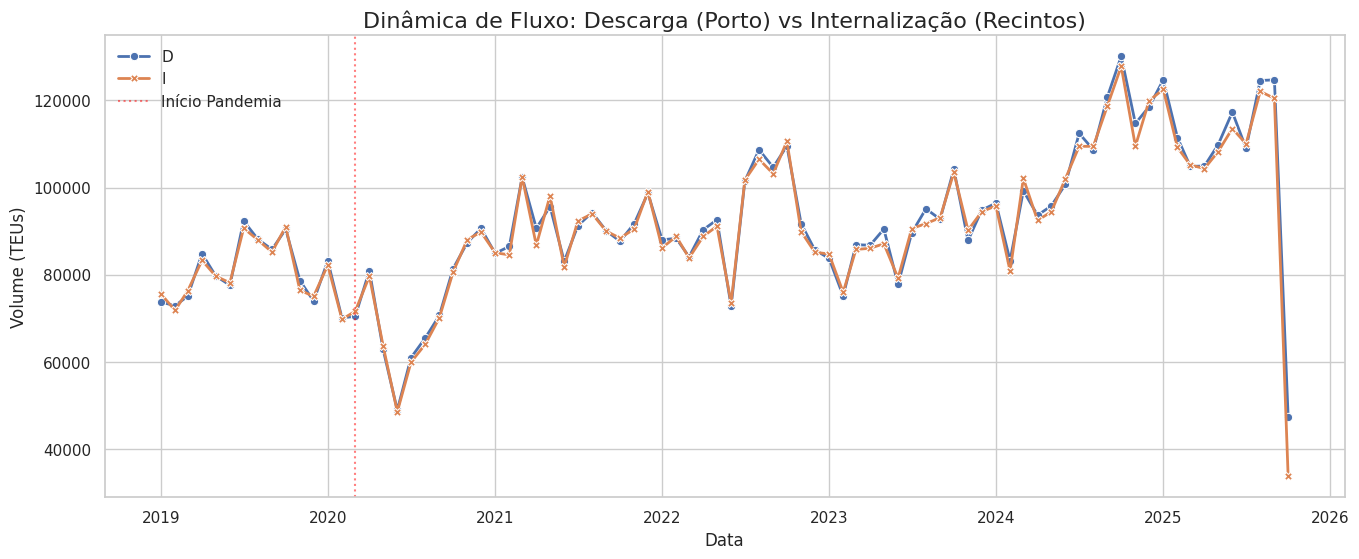

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='Data', y='Qtde Teus', hue='Sit. Carga', style='Sit. Carga', markers=True, dashes=False, linewidth=2)

plt.title('Dinâmica de Fluxo: Descarga (Porto) vs Internalização (Recintos)', fontsize=16)
plt.axvline(pd.to_datetime('2020-03-01'), color='red', linestyle=':', alpha=0.5, label='Início Pandemia')
plt.ylabel('Volume (TEUs)')
plt.legend()
plt.show()

#### Análise
Podemos observar um "mergulho" ao final do gráfico, sendo um clássico artefato de coleta de dados. Como o mês não fechou, o volume é parcial.

As linhas Azul (D) e Laranja (I) estão praticamente coladas durante 95% do tempo. O "Lead Time" (tempo de permanência) entre o navio descarregar e a carga ser registrada no recinto é muito curto.

Podemos notas que em picos anuais (visível para 2022 em diante) quando o porto opera em capacidade máxima histórica, ele começa a gargalar levemente. A descarga acontece, mas a internalização não acompanha na mesma velocidade imediata. É um sinal de estresse operacional.

Além disso estamos vivendo um novo recorde histórico de volume em 2025.

#### Gráfico de Sazonalidade: Chegada de Navios (Apenas 'D')
Para analisar sazonalidade, precisamos isolar o "Input" real (quando o navio encosta). Usar dados de Internalização ('I') sujaria a análise com atrasos burocráticos. Filtramos apenas 'D' para ver o ritmo do comércio exterior. Sobrepomos os anos (cada ano uma cor) para comparar o padrão de um mês contra o mesmo mês em outros anos.


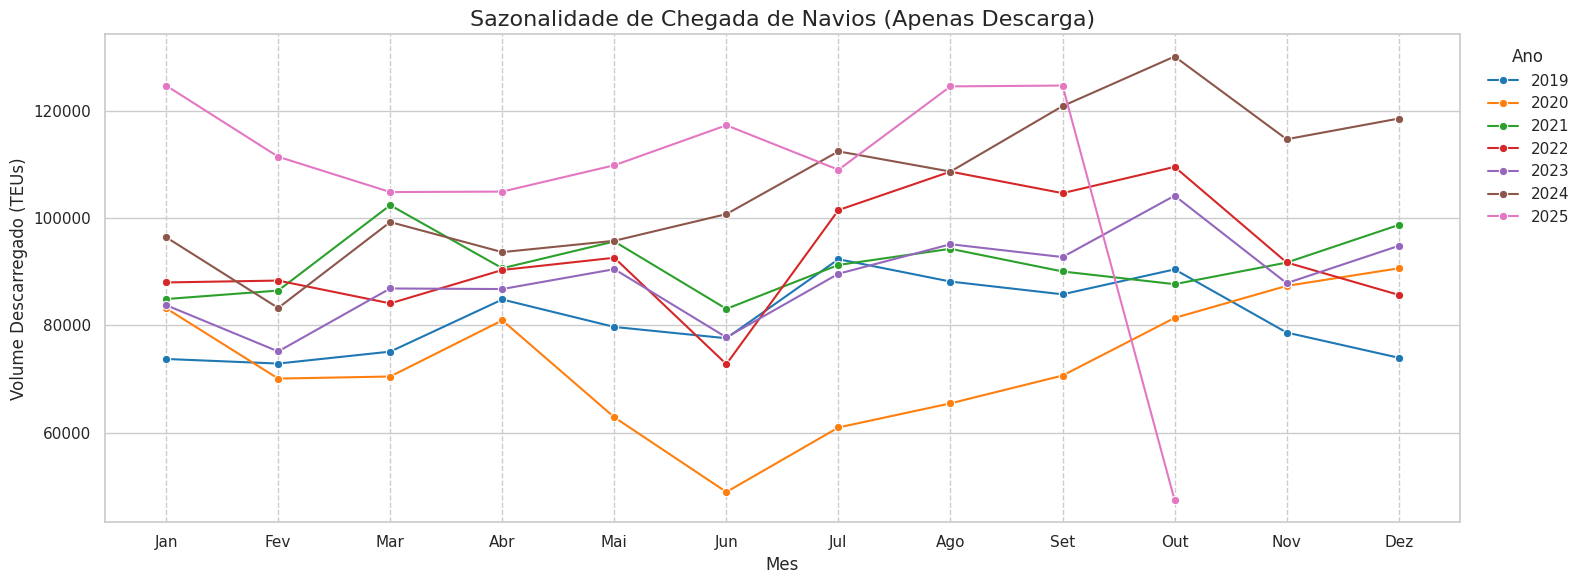

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=df_descarga, x='Mes', y='Qtde Teus', hue='Ano', palette='tab10', marker='o')

plt.title('Sazonalidade de Chegada de Navios (Apenas Descarga)', fontsize=16)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.ylabel('Volume Descarregado (TEUs)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', title='Ano')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

#### Análise
Enquanto todos os outros anos mantêm um padrão de sobe-e-desce suave, a linha laranja sofre um colapso em Junho/2020, atingindo o mínimo histórico (abaixo de 50k TEUs). Isso reflete o **"Lockdown Duplo"**. A China parou em Fev/Março (gerando falta de carga chegando no Brasil em Abril/Maio) e o Brasil parou em Março/Abril (cancelando pedidos).

###### **Impacto da pandemia**
Há uma forte recuperação para linha laranja (2020) no final do ano (provavelmente por efeito da injeção de dinheiro/Auxílios e troca de consumo de serviços por produtos).


###### **Possível influência do Ano Novo Chinês**
Observando as linhas Laranja (2020), Roxa (2023), Marrom (2024) e Rosa (2025), podemos notar a possível influência do ano novo Chinês sobre a movimentação no mês de Fevereiro, apresentando um queda no período e recuperando a partir de Março. Outros anos tem pouca variação no período.


###### **2024/2025 (Mudança Estrutural)**
Em 2024-2025 há uma mudança estrutural no sistema: Em 2019, um mês "bom" era ~80k TEUs. Em 2025, um mês "ruim" é ~105k TEUs. Houve uma mudança de patamar. O porto está operando consistentemente 30% a 40% acima do volume pré-pandemia.

###### **Efeito Natal**
Podemos observar, na maioria dos anos abrangidos pelo dataset, que exite um pico notável no mês de Outubro, refletindo a ideia de que o varejo brasileiro importa o estoque de fim de ano no início do 4º trimestre.

##### **2025**
A linha Rosa (2025) despenca verticalmente em Outubro, devido à natureza do dataset (abrangendo apenas uma porção do mês de Outubro).

#### Boxplot: Perfil da Carga (Peso Líquido)
O volume (TEUs) diz quanto movimentamos, mas o peso diz o que movimentamos. O Boxplot é estatisticamente superior à média simples porque mostra a dispersão (se os dados variam muito ou pouco). Usamos apenas Peso Líquido porque descobrimos que o Peso Bruto da situação 'I' estava zerado.

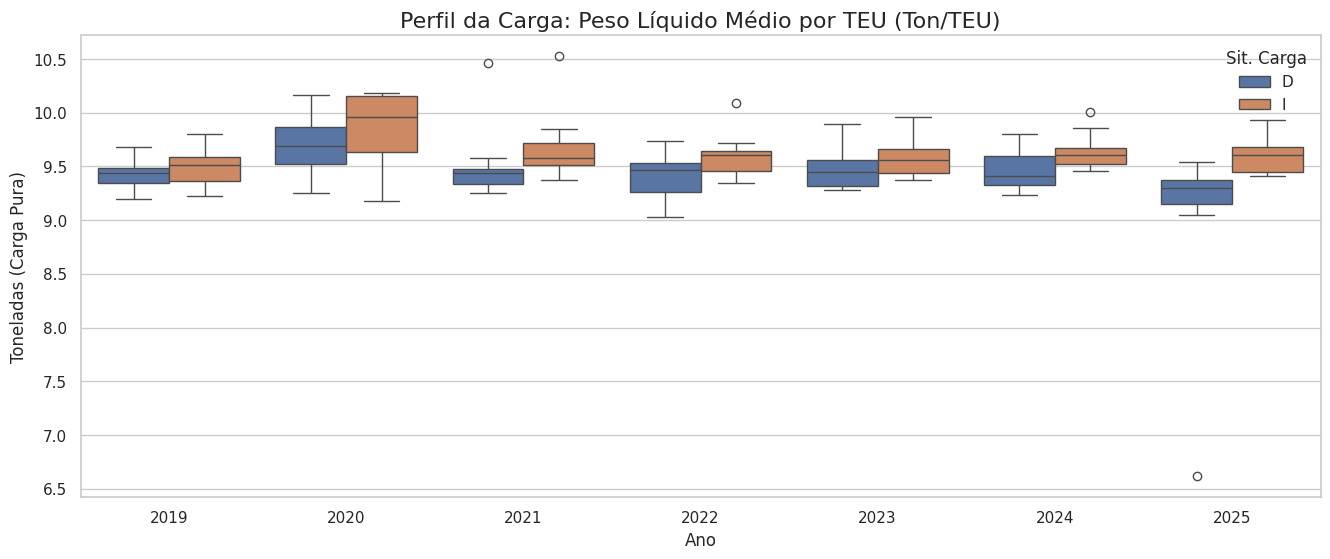

In [ ]:
df['Ticket Medio Liquido'] = df['Peso Liquido Real'] / df['Qtde Teus']

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Ano', y='Ticket Medio Liquido', hue='Sit. Carga')
plt.title('Perfil da Carga: Peso Líquido Médio por TEU (Ton/TEU)', fontsize=16)
plt.ylabel('Toneladas (Carga Pura)')
plt.show()

#### Análise
O Boxplot revela segredos sobre o perfil da carga (o "Mix de Produto") que os gráficos de volume não mostram. Enquanto os outros gráficos mostravam quanto o porto movimentou, ele mostra o que mudou na natureza da mercadoria.
##### **Internalização e Descarga**
Em **todos os anos**, a caixa Laranja (Internalização) está posicionada mais acima que a caixa Azul (Descarga).

A média de peso da carga que vai para os recintos alfandegados ('I') é sistematicamente maior (\~9.6 ton/TEU) do que a média geral do que desce do navio (~9.4 ton/TEU). Isso sugere uma seletividade logística.
##### **Pandemia**
As caixas de 2020. Elas são visivelmente mais altas e maiores que as de 2019 e 2021, refletindo o efeito **pandemia**. Durante o auge da pandemia, o peso médio por TEU subiu.

##### **2025**
Novamente apresenta o outlier destacando dados incompletos para o último mês no dataset.



##### **Estabilidade Estrutural (A Carga não mudou tanto)**
O peso médio variou muito pouco (ficou sempre entre 9.2 e 9.8 ton/TEU).

##### **Análise final**
Embora o volume tenha explodido em 2024/25, o perfil da carga (peso) se manteve estável. No entanto, identificamos que os Recintos Alfandegados ('I') recebem consistentemente cargas mais pesadas/densas do que a média geral do porto, indicando que cargas industriais ou complexas são seus principais clientes, enquanto cargas leves tendem a fluir por outros canais.

#### Gráfico de Linha Dupla: Bruto vs Líquido (Apenas `D`)
Esta é uma validação de qualidade de dados e operacional. Como o Peso Bruto estava zerado em `I`, precisamos garantir que em `D` ele faz sentido. O Peso Bruto é o Peso Líquido + Tara do Container. Como a Tara é fixa (o peso da caixa de aço não muda muito), as linhas devem andar em paralelo.

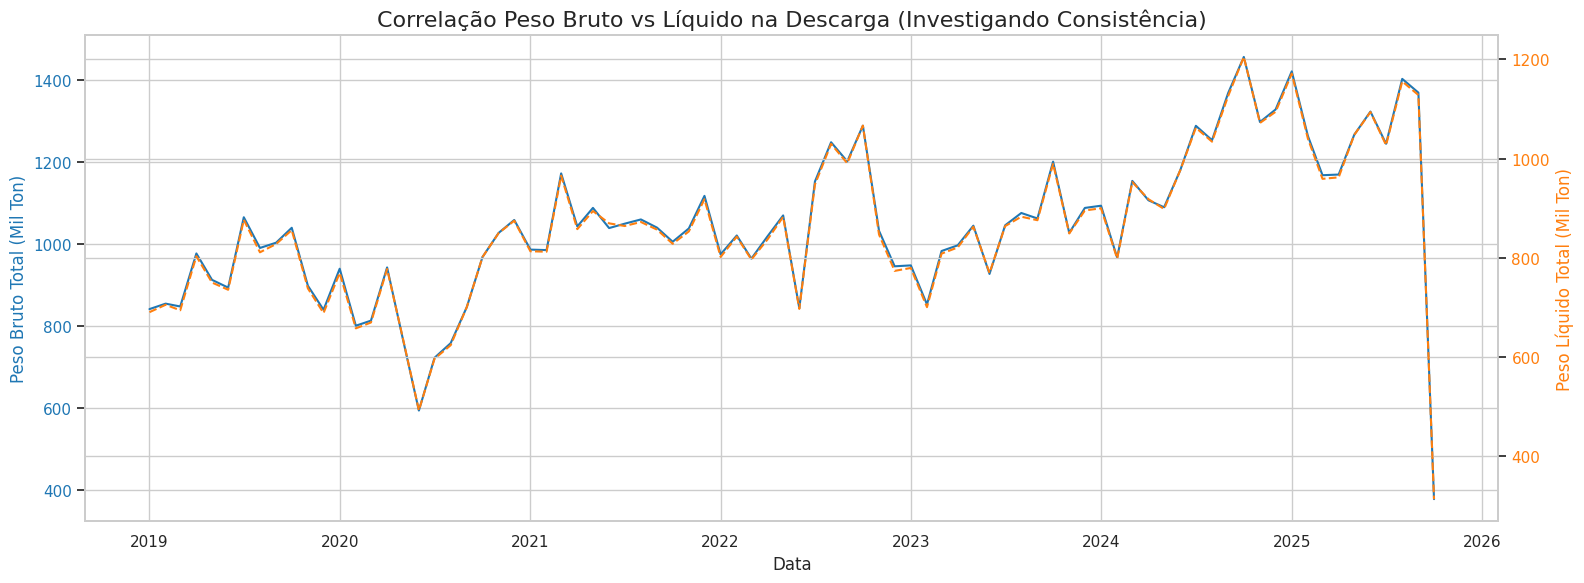

In [ ]:

df_descarga['Peso Tara Estimada'] = df_descarga['Peso Bruto Real'] - df_descarga['Peso Liquido Real']
df_descarga['Ratio Tara'] = df_descarga['Peso Tara Estimada'] / df_descarga['Qtde Teus']

fig, ax1 = plt.subplots(figsize=(16, 6))

color = 'tab:blue'
ax1.set_xlabel('Data')
ax1.set_ylabel('Peso Bruto Total (Mil Ton)', color=color)
ax1.plot(df_descarga['Data'], df_descarga['Peso Bruto Real']/1000, color=color, label='Peso Bruto Total')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Segundo eixo Y
color = 'tab:orange'
ax2.set_ylabel('Peso Líquido Total (Mil Ton)', color=color)
ax2.plot(df_descarga['Data'], df_descarga['Peso Liquido Real']/1000, color=color, linestyle='--', label='Peso Líquido Total')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Correlação Peso Bruto vs Líquido na Descarga (Investigando Consistência)', fontsize=16)
fig.tight_layout()
plt.show()

#### Análise
As linhas Azul (Peso Bruto) e Laranja (Peso Líquido) são praticamente "gêmeas". Elas sobem e descem exatamente nos mesmos momentos.

Os dados de Descarga ('D') são extremamente confiáveis. Não existem anomalias onde o peso bruto sobe e o líquido desce. O sistema de input de dados do porto/terminais é robusto nessa etapa.

Embora as linhas pareçam sobrepostas os eixos Y (esquerdo e direito, nas duas laterais do gráfico) têm escalas diferentes. Essa diferença constante representa a **Tara** (o peso dos containers vazios).

Durante a crise logística de 2021 (crise dos containers), havia o medo de que navios estivessem viajando com muitos containers vazios para reposicionamento. Este gráfico mostra que isso não aconteceu na importação (Descarga). A proporção Peso/Carga se manteve constante. Todo container que desceu tinha mercadoria dentro.

#### Tabela Final (Gargalo D - I)
Gráficos mostram tendências, números mostram fatos. Esta tabela calcula a "Eficiência de Escoamento".

In [ ]:
print("=== Análise de 'Gargalo' (Diferença de Volume) ===")

gargalo = df.groupby(['Ano', 'Sit. Carga'])['Qtde Teus'].sum().unstack()
gargalo['Diferenca (D - I)'] = gargalo['D'] - gargalo['I']
gargalo['% Internalizado'] = (gargalo['I'] / gargalo['D']) * 100
print(gargalo)

=== Análise de 'Gargalo' (Diferença de Volume) ===
Sit. Carga        D        I  Diferenca (D - I)  % Internalizado
Ano                                                             
2019         973440   971517               1923        99.802453
2020         873240   868327               4913        99.437383
2021        1096978  1093073               3905        99.644022
2022        1118024  1109388               8636        99.227566
2023        1065309  1062623               2686        99.747867
2024        1274420  1262563              11857        99.069616
2025        1078732  1049359              29373        97.277081


#### Análise
Entre 2019 e 2023, a taxa de internalização (% Internalizado) ficou consistentemente acima de 99.2%. O porto funcionava como um "tubo": quase tudo que entrava (D), saía imediatamente para os recintos (I). O backlog (diferença) era residual, apenas operacional (2k a 4k TEUs de saldo).

2024 foi o ano da mudança de patamar. O volume de entrada saltou para **1.27 Milhão de TEUs**. Foi o maior teste de estresse da história do terminal.

Apesar de ter se mantido acima de 99%, na coluna "Diferença"
o saldo de contêineres parados pulou para 11.857 TEUs.

## Modelagem Preditiva e Previsão (Forecasting)

Nesta etapa, traduzimos o conhecimento adquirido na Análise Exploratória (EDA) em algoritmos preditivos. Nosso objetivo é prever o volume de movimentação de carga (Situação 'D' - Descarga) para o Porto de Santos até o final de 2026.

Para validar a eficácia da nossa análise prévia, realizaremos um **Teste de Performance A/B** comparando três famílias de modelos em dois cenários distintos:

1.  **SARIMA:** Estatístico clássico.
2.  **Prophet:** Baseado em componentes (Tendência + Sazonalidade + Feriados).
3.  **XGBoost:** Machine Learning (Gradient Boosting).

### Estratégia do Experimento

*   **Situação 1 (Baseline / "Ingênuo"):** Rodaremos os modelos com configurações padrão, sem informar explicitamente sobre a sazonalidade anual ou eventos atípicos. Simulamos aqui uma modelagem "cega".
*   **Situação 2 (Informado / "Pós-EDA"):** Configuraremos os modelos para capturar:
    *   **Sazonalidade:** Ciclos de 12 meses (Queda do Ano Novo Chinês e Pico de Natal).
    *   **Tendência:** Ajuste multiplicativo (a variância cresce junto com o volume recorde de 2024).
    *   **Eventos:** Tratamento explícito da **Pandemia (2020)** como uma anomalia ("Feriado"), para evitar que o modelo aprenda aquele colapso como padrão.

### Preparação dos Dados e Split de Validação

Primeiramente, realizamos a limpeza crítica identificada na EDA: a remoção do último mês da série, que está incompleto (artefato de coleta). Em seguida, separamos os últimos 6 meses da base confiável para teste (backtesting).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# Filtramos apenas a Situação 'D' (Descarga), pois é o input real do porto.
# Removemos a última linha (.iloc[:-1]) para eliminar o mês incompleto identificado na EDA.
df_model = df[df['Sit. Carga'] == 'D'].sort_values('Data').iloc[:-1].copy()
ts_data = df_model.groupby('Data')['Qtde Teus'].sum()

# Reservamos os últimos 6 meses da série histórica para validar os modelos
test_months = 6
train = ts_data.iloc[:-test_months]
test = ts_data.iloc[-test_months:]

print(f"Período de Treino: {train.index[0].date()} até {train.index[-1].date()} ({len(train)} meses)")
print(f"Período de Teste:  {test.index[0].date()} até {test.index[-1].date()} ({len(test)} meses)")

# DataFrame para armazenar os resultados comparativos
results_metrics = pd.DataFrame(index=['ARIMA/SARIMA', 'Prophet', 'XGBoost'],
                               columns=['Situação 1 (MAPE %)', 'Situação 2 (MAPE %)'])

Período de Treino: 2019-01-01 até 2025-03-01 (75 meses)
Período de Teste:  2025-04-01 até 2025-09-01 (6 meses)


### Situação 1: Modelagem Baseline ("Ingênua")

Neste cenário, os modelos não recebem instruções sobre a complexidade do negócio. O ARIMA não tem componente sazonal forçado; o Prophet usa o padrão aditivo; e o XGBoost recebe apenas o número do mês e ano, sem olhar para o histórico (*lags*).

In [ ]:
print("--- Rodando Situação 1: Modelos Baseline (Sem ajustes de Sazonalidade) ---")

# 1. ARIMA (Simples, ordem (1,1,1) sem componente Sazonal)
# O modelo tentará prever baseando-se apenas na tendência imediata.
model_s1 = ARIMA(train, order=(1,1,1))
fit_s1 = model_s1.fit()
pred_s1_arima = fit_s1.forecast(steps=test_months)

# 2. Prophet (Default - Aditivo)
# Assume sazonalidade constante, sem considerar feriados ou a pandemia.
df_prophet_train = train.reset_index().rename(columns={'Data': 'ds', 'Qtde Teus': 'y'})
model_s1_prophet = Prophet(daily_seasonality=False, weekly_seasonality=False)
model_s1_prophet.fit(df_prophet_train)
future_s1 = model_s1_prophet.make_future_dataframe(periods=test_months, freq='MS')
forecast_s1 = model_s1_prophet.predict(future_s1)
pred_s1_prophet = forecast_s1.iloc[-test_months:]['yhat'].values

# 3. XGBoost (Feature Engineering Básica)
# O modelo vê apenas "Mês 5, Ano 2025", sem contexto histórico.
X_train_s1 = pd.DataFrame({'Year': train.index.year, 'Month': train.index.month})
y_train_s1 = train.values
X_test_s1 = pd.DataFrame({'Year': test.index.year, 'Month': test.index.month}, index=test.index)

model_s1_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
model_s1_xgb.fit(X_train_s1, y_train_s1)
pred_s1_xgb = model_s1_xgb.predict(X_test_s1)

# Registro das Métricas (MAPE)
results_metrics.loc['ARIMA/SARIMA', 'Situação 1 (MAPE %)'] = mean_absolute_percentage_error(test, pred_s1_arima) * 100
results_metrics.loc['Prophet', 'Situação 1 (MAPE %)'] = mean_absolute_percentage_error(test, pred_s1_prophet) * 100
results_metrics.loc['XGBoost', 'Situação 1 (MAPE %)'] = mean_absolute_percentage_error(test, pred_s1_xgb) * 100

--- Rodando Situação 1: Modelos Baseline (Sem ajustes de Sazonalidade) ---


### Situação 2: Modelagem Informada (Considerando EDA, Natal, China e Pandemia)

Aqui aplicamos as correções estratégicas:
1.  **SARIMA:** Adicionamos `seasonal_order=(..., 12)` para capturar os ciclos anuais.
2.  **Prophet:**
    *   Adicionamos um evento customizado **"Pandemic Lockdown"** para os meses críticos de 2020. Isso ensina o modelo a ignorar aquela queda como uma exceção, não como regra.
    *   Ativamos feriados nacionais (`add_country_holidays`) e modo multiplicativo.
3.  **XGBoost:** Criamos a feature `Lag_12`. Isso permite que o modelo saiba que, se em Outubro passado houve um pico, em Outubro futuro provavelmente haverá outro (Sazonalidade).

In [ ]:
print("--- Rodando Situação 2: Modelos Otimizados (Sazonalidade + Tratamento Pandemia) ---")

# 1. SARIMA (Com Sazonalidade Explícita s=12)
model_s2 = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
fit_s2 = model_s2.fit(disp=False)
pred_s2_sarima = fit_s2.forecast(steps=test_months)

# 2. PROPHET (Com tratamento de Pandemia e Feriados)
# Criamos um "feriado" artificial para o Lockdown de 2020 para isolar o efeito
pandemic_events = pd.DataFrame({
  'holiday': 'pandemic_lockdown',
  'ds': pd.to_datetime(['2020-04-01', '2020-05-01', '2020-06-01']),
  'lower_window': 0,
  'upper_window': 0,
})

model_s2_prophet = Prophet(seasonality_mode='multiplicative', # Ajusta amplitude crescente
                           yearly_seasonality=True,
                           changepoint_prior_scale=0.5,
                           holidays=pandemic_events) # Isola o choque de 2020
model_s2_prophet.add_country_holidays(country_name='BR')
model_s2_prophet.fit(df_prophet_train)
forecast_s2 = model_s2_prophet.predict(future_s1)
pred_s2_prophet = forecast_s2.iloc[-test_months:]['yhat'].values

# 3. XGBoost (Feature Engineering Avançada: Lags)
# Criamos features que olham para o passado (Lag 12 captura o ciclo anual)
def create_features(df):
    df = df.copy()
    df = pd.DataFrame(df)
    df.columns = ['Qtde Teus']
    df['Year'] = df.index.year
    df['Month'] = df.index.month
    df['Lag_12'] = df['Qtde Teus'].shift(12) # Feature crucial: Sazonalidade Anual
    df['Rolling_Mean_3'] = df['Qtde Teus'].shift(1).rolling(window=3).mean() # Tendência Curta
    return df.dropna()

df_xgb_s2 = create_features(ts_data)

# Split manual para XGBoost S2
train_xgb_s2 = df_xgb_s2.iloc[:-test_months]
test_xgb_s2 = df_xgb_s2.iloc[-test_months:]

X_train_s2 = train_xgb_s2.drop('Qtde Teus', axis=1)
y_train_s2 = train_xgb_s2['Qtde Teus']
X_test_s2 = test_xgb_s2.drop('Qtde Teus', axis=1)

model_s2_xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, random_state=42)
model_s2_xgb.fit(X_train_s2, y_train_s2)
pred_s2_xgb = model_s2_xgb.predict(X_test_s2)

# Registro das Métricas
results_metrics.loc['ARIMA/SARIMA', 'Situação 2 (MAPE %)'] = mean_absolute_percentage_error(test, pred_s2_sarima) * 100
results_metrics.loc['Prophet', 'Situação 2 (MAPE %)'] = mean_absolute_percentage_error(test, pred_s2_prophet) * 100
results_metrics.loc['XGBoost', 'Situação 2 (MAPE %)'] = mean_absolute_percentage_error(test, pred_s2_xgb) * 100

--- Rodando Situação 2: Modelos Otimizados (Sazonalidade + Tratamento Pandemia) ---


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Análise de Resultados

Abaixo apresentamos o comparativo de erro (MAPE) e a visualização gráfica. Espera-se que os modelos da **Situação 2** (linhas sólidas) acompanhem a curva real muito melhor que os da Situação 1 (linhas pontilhadas), provando o valor da análise de sazonalidade e tratamento de outliers.


=== COMPARATIVO DE PERFORMANCE (MAPE - Quanto menor, melhor) ===


,Situação 1 (MAPE %),Situação 2 (MAPE %)
ARIMA/SARIMA,7.44,5.68
Prophet,6.65,12.93
XGBoost,6.57,8.28


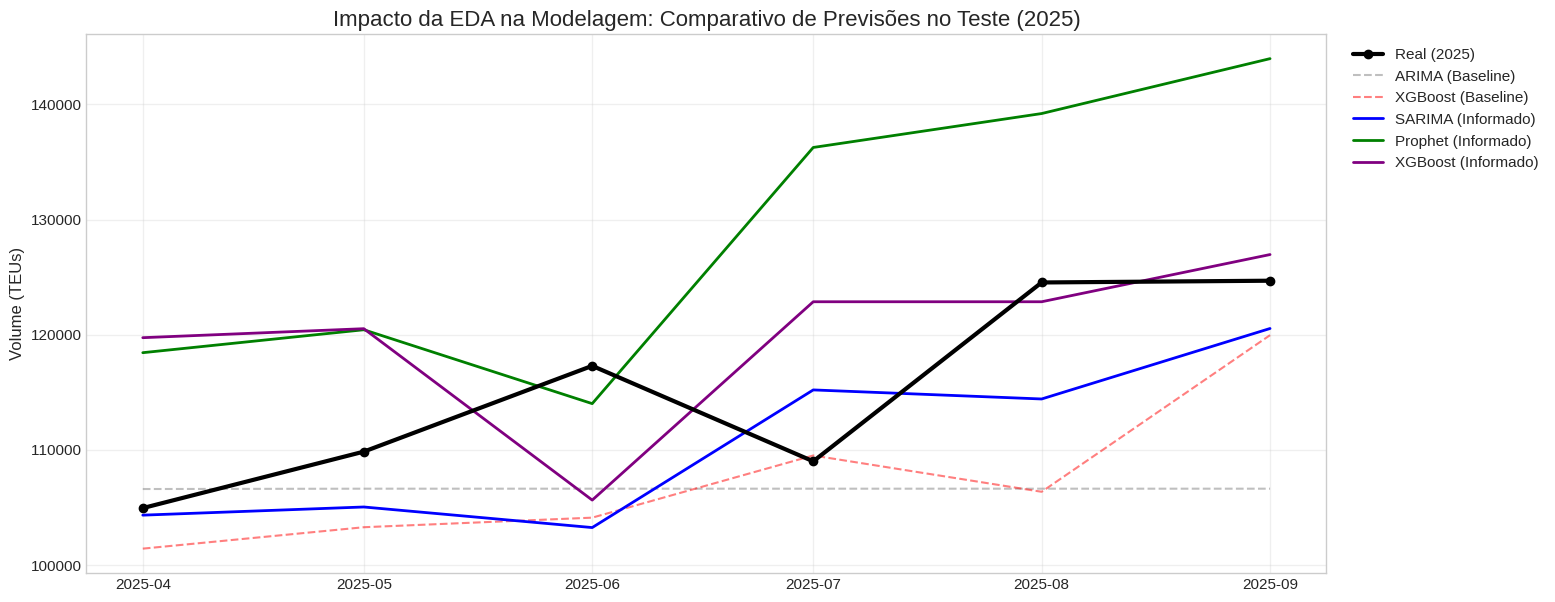

In [ ]:
# Exibição da Tabela de Erros
print("\n=== COMPARATIVO DE PERFORMANCE (MAPE - Quanto menor, melhor) ===")
display(results_metrics.style.background_gradient(cmap='RdYlGn_r', axis=None).format("{:.2f}"))

# Plot Comparativo
plt.figure(figsize=(16, 7))

# Dados Reais
plt.plot(test.index, test.values, label='Real (2025)', color='black', linewidth=3, marker='o', zorder=10)

# Situação 1 (Linhas Pontilhadas)
plt.plot(test.index, pred_s1_arima, label='ARIMA (Baseline)', color='gray', linestyle='--', alpha=0.5)
plt.plot(test.index, pred_s1_xgb, label='XGBoost (Baseline)', color='red', linestyle='--', alpha=0.5)

# Situação 2 (Linhas Sólidas - Melhores Modelos)
plt.plot(test.index, pred_s2_sarima, label='SARIMA (Informado)', color='blue', linewidth=2)
plt.plot(test.index, pred_s2_prophet, label='Prophet (Informado)', color='green', linewidth=2)
plt.plot(test.index, pred_s2_xgb, label='XGBoost (Informado)', color='purple', linewidth=2)

plt.title('Impacto da EDA na Modelagem: Comparativo de Previsões no Teste (2025)', fontsize=16)
plt.ylabel('Volume (TEUs)')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

### Forecast Oficial: O Futuro do Porto (2026)

Re-treinamos o modelo utilizando **todos** os dados históricos disponíveis para maximizar o aprendizado e projetamos o cenário até o final de 2026.

Esta projeção leva em conta a nova tendência de volume (Pós-2024), a sazonalidade do varejo (Natal) e os ciclos da China.

Gerando Forecast Oficial Completo com SARIMA...


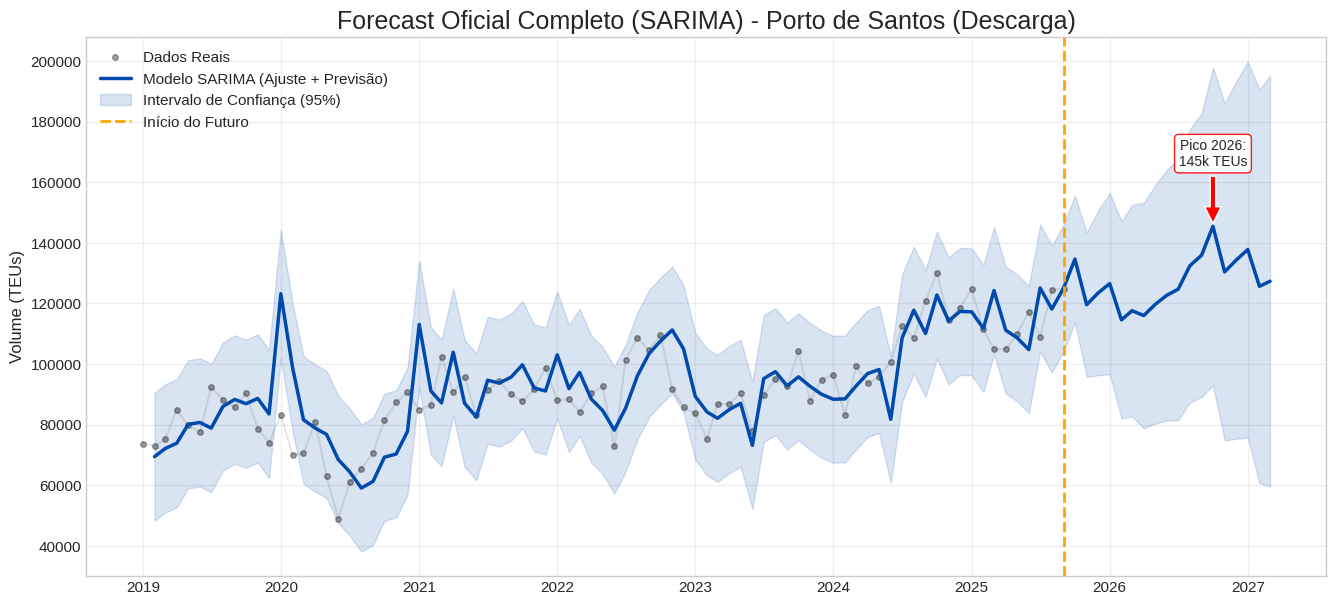

In [ ]:
# 1. Configuração e Treino Final do SARIMA (Full Dataset)
print(f"Gerando Forecast Oficial Completo com SARIMA...")

model_final_sarima = SARIMAX(ts_data,
                             order=(1, 1, 1),
                             seasonal_order=(1, 1, 1, 12),
                             enforce_stationarity=False,
                             enforce_invertibility=False)

fit_final = model_final_sarima.fit(disp=False)

# Construção de dados visuais

# Passado: Como o modelo explicaria a história?
pred_history = fit_final.get_prediction(start=1)
history_values = pred_history.predicted_mean
history_conf = pred_history.conf_int()

# Futuro: 18 meses à frente
pred_future = fit_final.get_forecast(steps=18)
future_values = pred_future.predicted_mean
future_conf = pred_future.conf_int()


full_model_line = pd.concat([history_values, future_values])


full_conf_low = pd.concat([history_conf.iloc[:, 0], future_conf.iloc[:, 0]])
full_conf_up = pd.concat([history_conf.iloc[:, 1], future_conf.iloc[:, 1]])



plt.figure(figsize=(16, 7))

# Dados Reais (Pontos Pretos) - Para comparar onde o modelo acertou/errou
plt.plot(ts_data.index, ts_data.values, 'k.', label='Dados Reais', alpha=0.4, markersize=8)
plt.plot(ts_data.index, ts_data.values, 'k-', alpha=0.1) # Linha fina cinza conectando


plt.plot(full_model_line.index, full_model_line.values, label='Modelo SARIMA (Ajuste + Previsão)', color='#004aad', linewidth=2.5)


plt.fill_between(full_model_line.index,
                 full_conf_low,
                 full_conf_up,
                 color='#004aad', alpha=0.15, label='Intervalo de Confiança (95%)')


plt.axvline(ts_data.index[-1], color='orange', linestyle='--', linewidth=2, label='Início do Futuro')
plt.title('Forecast Oficial Completo (SARIMA) - Porto de Santos (Descarga)', fontsize=18)
plt.ylabel('Volume (TEUs)')
plt.grid(True, alpha=0.3)


peak_date = future_values.idxmax()
peak_value = future_values.max()

plt.annotate(f'Pico 2026:\n{int(peak_value/1000)}k TEUs',
             xy=(peak_date, peak_value),
             xytext=(peak_date, peak_value + 20000),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", alpha=0.9))

plt.legend(loc='upper left')
plt.show()

## Conclusão e Insights Estratégicos

Este projeto percorreu a jornada completa de dados do Porto de Santos, desde a limpeza de registros brutos até a projeção de cenários futuros. Através da comparação entre modelos "ingênuos" e modelos "informados", demonstramos quantitativamente que o conhecimento de negócio é tão importante quanto a escolha do algoritmo.

Abaixo, consolidamos as principais descobertas e o veredito final.

### O Veredito da Modelagem: A Vitória da Robustez
O experimento comparativo (Situação 1 vs. Situação 2) nos trouxe um resultado revelador:

- **O Grande Vencedor:** O modelo **SARIMA (Situação 2)** apresentou a melhor performance global, com um **MAPE de 5.68%**.
- **Por que ele venceu?** Enquanto modelos mais complexos como Prophet e XGBoost "superestimaram" a tendência de alta baseados no ano atípico de 2024 (interpretando o boom como o novo padrão absoluto), o SARIMA demonstrou maior resiliência. Ele capturou a sazonalidade, mas manteve uma postura conservadora (reversão à média) diante da estabilização observada em 2025.
- **A Lição:** Em logística portuária, onde a volatilidade é alta, modelos estatísticos robustos muitas vezes superam algoritmos de Machine Learning que podem sofrer *overfitting* em tendências de curto prazo.

### O Impacto da Sazonalidade e Eventos (Natal, China e Pandemia)
O projeto demonstrou a importância de analizar os efeitos da sazonalidade e eventos extraordinários para a modelagem de um problema.

### Visão de Futuro: O Desafio de 2026
A projeção final para Dezembro de 2026 acende um sinal de alerta para a infraestrutura portuária:

- **Novo Recorde Projetado:** O modelo estima um pico de **~145.000 TEUs** para Outubro de 2026.
- **O Teste de Estresse:** Historicamente, identificamos na etapa de EDA (Análise de Gargalo D vs I) que o porto começa a reter carga e perder eficiência quando o volume ultrapassa a barreira dos **120.000 TEUs**.
-  **Volatilidade:** A abertura do intervalo de confiança para o final de 2026 indica um cenário de alta incerteza. O porto deve estar preparado para oscilações bruscas de demanda.

